In [2]:
import pandas as pd
import numpy as np
import altair as alt
from IPython.display import HTML

alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [4]:
alt.renderers.enable('svg')

HTML('''
<svg height="0" width="0" xmlns="http://www.w3.org/2000/svg" version="1.1">
    <defs>

        <!-- From SVG stripe generator 
        https://www.coffee-break-designs.com/labs/svg_stripe_generator/ -->
        
        <pattern id="pattern_1" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#4c78a8" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_2" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(135)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#f58518" stroke-width="4" />
        </pattern>

        <pattern id="pattern_6" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(0)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#eeca3b" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_4" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#72b7b2" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_5" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#54a24b" stroke-width="4" />
            <line x1="0" y="0" x2="5" y2="0" stroke="#54a24b" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_3" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="5" y2="0" stroke="#e45756" stroke-width="4" />
            <line x1="0" y="0" x2="0" y2="5" stroke="#e45756" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_7" patternUnits="userSpaceOnUse" width="10" height="10" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="0" y2="10" stroke="#b279a2" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_8" patternUnits="userSpaceOnUse" width="10" height="10" patternTransform="rotate(135)">
            <line x1="0" y="0" x2="0" y2="10" stroke="#ff9da6" stroke-width="4" />
        </pattern>
        
        
        <pattern id="pattern_9" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(45)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#7570b3" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_10" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(135)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#bcbd22" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_11" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(0)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#9e765f" stroke-width="4" />
        </pattern>
        
        <pattern id="pattern_12" patternUnits="userSpaceOnUse" width="5" height="5" patternTransform="rotate(90)">
            <line x1="0" y="0" x2="0" y2="5" stroke="#79706e" stroke-width="4" />
        </pattern>
        
    </defs>
</svg>
''')

In [5]:
pattern_scale_3 = ({
       'range': ['url(#pattern_1)', 'url(#pattern_2)', 'url(#pattern_3)', 'url(#pattern_4)','url(#pattern_8)'
                 ,'url(#pattern_5)','url(#pattern_6)','url(#pattern_7)']
    })

pattern_scale_1 = ({
       'range': ['url(#pattern_1)', 'url(#pattern_2)', 'url(#pattern_3)', 'url(#pattern_4)'
                 ,'url(#pattern_5)','url(#pattern_6)','url(#pattern_7)','url(#pattern_8)']
    })

pattern_scale_2 = ({
       'range': ['url(#pattern_9)', 'url(#pattern_10)', 'url(#pattern_11)', 'url(#pattern_12)']
    })

In [15]:
names2realnames = {
    'MOO':'       MOO',
    'MOAE':'    MOAE',
    'MOAG':'     MOAG',
    'RANDOM_Alternate':'ALTERNATE',
    'MOEG':'      MOEG',
    'MOA':' MOA',
    'MOE':'  MOE',
    'MOG':'   MOG'
}

BKT NCC == 1

In [57]:
df_2 = pd.read_csv('./results/bkt_results_3_ncc_1.csv')
df_2.method = df_2.method.apply(lambda x: names2realnames[x])

In [58]:
df = df_2

methods = set(df.method.unique())
len_users = len(df.student.unique())

print(len_users)

max_progression = df.groupby(['method','student']).new_skill_student.max().reset_index()
max_progression.new_skill_student = max_progression.new_skill_student.apply(lambda x: x - 0.13)

df_max_step = df.groupby(['student','method']).step.max().reset_index()

df_time = df.groupby(['student','method']).time.mean().reset_index()

max_skill = df.groupby(['method','student']).new_skill_student.max().reset_index()
max_skill['Mastery'] = max_skill.new_skill_student.apply(lambda x: 1 if x > 0.98 else 0)

mastery = max_skill[max_skill.Mastery==1][['method','student']].values.tolist()

max_skill = max_skill.groupby('method').Mastery.sum().reset_index()
max_skill.Mastery = max_skill.Mastery.apply(lambda x: x/len_users*100)

100


In [59]:
st = list(df_max_step.student.unique())[0]

for mt in methods - set(df_max_step.method.unique()):
    df_max_step.loc[len(df_max_step)] = [st, mt, 0]
    
    
st = list(df_time.student.unique())[0]

for mt in methods - set(df_time.method.unique()):
    df_time.loc[len(df_time)] = [st, mt, 0]
    
    
st = list(max_progression.student.unique())[0]

for mt in methods - set(max_progression.method.unique()):
    max_progression.loc[len(max_progression)] = [mt, st, 0]
    

for mt in methods - set(max_skill.method.unique()):
    max_skill.loc[len(max_skill)] = [mt, 0]

In [60]:
pattern_scale = pattern_scale_1

 BKT NCC == 3

In [40]:
df_2 = pd.read_csv('./results/bkt_results_3_ncc_3.csv')
df_2.method = df_2.method.apply(lambda x: names2realnames[x])

In [41]:
df = df_2

methods = set(df.method.unique())
len_users = len(df.student.unique())

print(len_users)

max_progression = df.groupby(['method','student']).new_skill_student.max().reset_index()
max_progression.new_skill_student = max_progression.new_skill_student.apply(lambda x: x - 0.13)

df_max_step = df.groupby(['student','method']).step.max().reset_index()

df_time = df.groupby(['student','method']).time.mean().reset_index()

max_skill = df.groupby(['method','student']).new_skill_student.max().reset_index()
max_skill['Mastery'] = max_skill.new_skill_student.apply(lambda x: 1 if x > 0.98 else 0)

mastery = max_skill[max_skill.Mastery==1][['method','student']].values.tolist()

max_skill = max_skill.groupby('method').Mastery.sum().reset_index()
max_skill.Mastery = max_skill.Mastery.apply(lambda x: x/len_users*100)

100


In [42]:
pattern_scale = pattern_scale_3

IRT

In [16]:
df_2 = pd.read_csv('./results/irt_results_3_ncc_1.csv')
df_2.method = df_2.method.apply(lambda x: names2realnames[x])

In [18]:
df = df_2

methods = set(df.method.unique())
len_users = len(df.student.unique())

print(len_users)

max_progression = df.groupby(['method','student']).new_skill_student.max().reset_index()
max_progression.new_skill_student = max_progression.new_skill_student.apply(lambda x: x - 0.13)

df_max_step = df.groupby(['student','method']).step.max().reset_index()

df_time = df.groupby(['student','method']).time.mean().reset_index()

max_skill = df.groupby(['method','student']).new_skill_student.max().reset_index()
max_skill['Mastery'] = max_skill.new_skill_student.apply(lambda x: 1 if x > 0.98 else 0)

mastery = max_skill[max_skill.Mastery==1][['method','student']].values.tolist()

max_skill = max_skill.groupby('method').Mastery.sum().reset_index()
max_skill.Mastery = max_skill.Mastery.apply(lambda x: x/len_users*100)

100


In [19]:
pattern_scale = pattern_scale_3

BKT Variable initial values

In [27]:
df_2 = pd.read_csv('./results/bkt_results_3_ncc_1_var_init.csv')
df_2.method = df_2.method.apply(lambda x: names2realnames[x])

In [32]:
df = df_2

methods = set(df.method.unique())
len_users = len(df.student.unique())

max_skill = df.groupby(['method','student']).new_skill_student.max().reset_index(name='max_skill')
min_skill = df.groupby(['method','student']).skill_student.min().reset_index(name='min_skill')
max_skill = pd.merge(max_skill,min_skill,on=['method','student'])

max_skill['new_skill_student'] = max_skill['max_skill'] - max_skill['min_skill']
max_progression = max_skill.copy()

max_skill['Mastery'] = max_skill.new_skill_student.apply(lambda x: 1 if x >= 0.4 else 0)
mastery = max_skill[max_skill.Mastery==1][['method','student']].values.tolist()
max_skill = max_skill.groupby('method').Mastery.sum().reset_index()
max_skill.Mastery = max_skill.Mastery.apply(lambda x: x/len_users*100)

max_progression.new_skill_student = max_progression.new_skill_student.apply(lambda x: x if x < 0.4 else 0.4)

df_max_step = df.groupby(['student','method']).step.max().reset_index()

df_time = df.groupby(['student','method']).time.mean().reset_index()

In [33]:
pattern_scale = pattern_scale_3

Skill gain

In [20]:
wdth = 150
heit = 400
    
progression_chart = alt.Chart(max_progression).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
       alt.X('mean(new_skill_student)', #scale=alt.Scale(domain=(0,0.5)),
              axis=alt.Axis(title="Skill gain",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
    
    
        alt.Y('method:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        fill = alt.Fill('method:N',title='', scale=pattern_scale, 
                        legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = heit,
        height = wdth,
    )

error_bars_progression = alt.Chart(max_progression).mark_errorbar(ticks=True).encode(
        y='method:N',
        x=alt.Y('new_skill_student',title='Skill gain'),
    )

Number of iterations

In [21]:
wdth = 150
heit = 300
    
steps_chart = alt.Chart(df_max_step).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('method:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('mean(step)',
              axis=alt.Axis(title="Iterations",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
        
        fill = alt.Fill('method:N',title='', #scale=pattern_scale, legend = None
                        #legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        #titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
        title = '(b)'
    )

error_bars_steps = alt.Chart(df_max_step).mark_errorbar(ticks=True).encode(
        x='method:N',
        y=alt.Y('step',title='Iterations'),
    )

Time

In [22]:
wdth = 150
heit = 400
    
time_chart = alt.Chart(df_time).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('mean(time)', scale=alt.Scale(domain=(0,8)),
              axis=alt.Axis(title="Time (sec)",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 6,grid=False,labelAngle=0)
             ),
        
        alt.Y('method:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        fill = alt.Fill('method:N',title='', scale=pattern_scale, legend=None
                        #legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        #titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = heit,
        height = wdth,
    )

Mastery

In [23]:
wdth = 150
heit = 300
    
mastery_chart = alt.Chart(max_skill).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('method:N',axis=alt.Axis(title="",labels=False, titleFontSize=26,
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('Mastery',
              axis=alt.Axis(title="Mastery (%)",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
        
        fill = alt.Fill('method:N', title='', scale=pattern_scale, #legend = None
                        legend=alt.Legend(orient='bottom', titleFontSize=25, columns=3, labelFontSize=23, 
                        titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
        title = '(a)'
    )

Graphs

In [ ]:
r = progression_chart+error_bars_progression
r.configure_title(fontSize=22)

In [ ]:
r = alt.hconcat(mastery_chart,steps_chart+error_bars_steps)
r.configure_title(fontSize=22)

In [ ]:
r = time_chart
r.configure_title(fontSize=22)

Skill Progression

In [ ]:
df2 = df.copy()

methods = ['       MOO','    MOAE','      MOEG','     MOAG', 'ALTERNATE',]

df_resultats_gp = pd.DataFrame(columns=['student','method','skill','gap','new_skill','step'])
cpt = 0

df = df[df.method.isin(methods)]

print(df.method.unique())

for idx, user in enumerate(list(df.student.unique())):
    if idx%20==0:
        print(idx)
    
    df_local_2 = df[df.student==user]
    
    for met in methods:
        df_local = df_local_2[df_local_2.method==met]
        
        seen_false = []
        
        for raw in df_local.itertuples():
            
            res_raw = [user, met, raw[3]]
            if met == 'ALTERNATE' and 'nan' in raw[4]:
                materials = prev_materials
            else:
                materials = eval(raw[4])
                prev_materials = materials
                
            correct = eval(raw[5])
            
            gap = []
            add_false = []
            
            for mat, c in zip(materials, correct):
                if c == 0:
                    add_false.append(mat)
                    
                incorrect_seen = [abs(prev_mat-mat) for prev_mat in seen_false]
                if len(incorrect_seen) == 0:
                    gap.append(0)
                else:
                    gap.append( sum(incorrect_seen)/len(incorrect_seen) )

            seen_false.extend(add_false)
            
            if len(seen_false) > 3:
                seen_false = seen_false[-3:]
            
            if len(gap) == 0:
                res_raw.extend([0, raw[6], raw[7]])
            else:
                res_raw.extend([sum(gap)/len(gap), raw[6], raw[7]])
            df_resultats_gp.loc[cpt] = res_raw
            cpt += 1

In [ ]:
for met in df_resultats_gp.method.unique():
    loc = df_resultats_gp[df_resultats_gp.method==met]
    maxi = loc.step.max()
    
    len_st = len(loc.student.unique())
    
    for idx, st in enumerate(loc.student.unique()):
        print(met,' ',idx/len_st)
        loc2 = loc[loc.student==st]
        maxi_2 = loc2.step.max()
        remain_step = maxi - maxi_2
        
        loc2 = loc2.tail(1)
        
        maxi_skill = loc2.skill.max()
        maxi_gap = loc2.gap.max()
        maxi_new_skill = loc2.new_skill.max()
        
        for step in range(maxi_2+1,maxi_2+1+remain_step):
            df_resultats_gp.loc[len(df_resultats_gp)] = [st, met, maxi_skill, 0, maxi_new_skill, step]

In [ ]:
df_resultats_gp_2 = df_resultats_gp.groupby(['method','step']).new_skill.mean().reset_index()

df_resultats_gp_2 = df_resultats_gp_2.groupby(['method'])['new_skill'].rolling(2)\
.mean().reset_index().drop(columns=['level_1'])

steps = []

for met in df_resultats_gp_2.method.unique():
    steps += list(range(1,1+len(df_resultats_gp_2[df_resultats_gp_2.method == met])))
    
df_resultats_gp_2['step'] = steps

In [ ]:
wdth = 600
heit = 300
    
gap_evol_chart_3 = alt.Chart(df_resultats_gp_2).mark_line(interpolate='basis',strokeWidth=2.5).encode(
        alt.X('step',axis=alt.Axis(title="Iterations", titleFontSize=26, tickCount=10, 
                                   labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('new_skill', scale=alt.Scale(domain=(0.3,0.9)),
              axis=alt.Axis(title="Skill progression",
                           labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            grid=False,labelAngle=0)
             ),
        
        color=alt.Color('method:N',title='',
                        scale=alt.Scale( range=['#4c78a8','#f58518','#e45756','#72b7b2','#ff9da6'] )
                        #scale=alt.Scale( range=['#4c78a8','#72b7b2','#ff9da6'] )
                       ),    
        
        strokeDash=alt.StrokeDash('method:N',title='',
                        scale=alt.Scale( range=[ [8,4],[8,2],[4,2],[],[4,8] ] ),
                        #scale=alt.Scale( range=[ [8,4],[],[4,8] ] ),
                        legend=None,
                       #legend=alt.Legend(orient='bottom',columns=5,
                       #titleFontSize=25, labelFontSize=23, titleFontStyle='italic',
                        #labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=2000, symbolStrokeWidth=5) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
    )


In [ ]:
gap_evol_chart_3

MAB

In [42]:
strategynames = {
    'Epsilon-g':' Ԑ-GREEDY',
    'Softmax':'SOFTMAX',
    'Thompson':'THOMPSON',
    'Ucb':'UCB'
}

In [61]:
df_3 = pd.read_csv('./results/bkt_results_3_ncc_1_mab.csv')
df_3.strategy = df_3.strategy.apply(lambda x: strategynames[x])

pattern_scale = pattern_scale_2

In [62]:
df_ = df_3

methods_2 = set(df_.strategy.unique())
len_users_2 = len(df_.student.unique())

max_progression_2 = df_.groupby(['strategy','student']).new_skill_student.max().reset_index()
max_progression_2.new_skill_student = max_progression_2.new_skill_student.apply(lambda x: x - 0.13)

df_max_step_2 = df_.groupby(['student','strategy']).step.max().reset_index()

df_time_2 = df_.groupby(['student','strategy']).time.mean().reset_index()

max_skill_2 = df_.groupby(['strategy','student']).new_skill_student.max().reset_index()
max_skill_2['Mastery'] = max_skill_2.new_skill_student.apply(lambda x: 1 if x > 0.98 else 0)
mastery_2 = max_skill_2[max_skill_2.Mastery==1][['strategy','student']].values.tolist()
max_skill_2 = max_skill_2.groupby('strategy').Mastery.sum().reset_index()
max_skill_2.Mastery = max_skill_2.Mastery.apply(lambda x: x/len_users_2*100)

In [63]:
max_progression_bar = max_progression_2[['strategy']]#.drop_duplicates()

v = max_progression[max_progression.method==names2realnames['MOO']].new_skill_student.mean()
max_progression_bar['prog_1'] = v

v = max_progression[max_progression.method=='ALTERNATE'].new_skill_student.mean()
max_progression_bar['prog_2'] = v

v = max_progression[max_progression.method==names2realnames['MOAE']].new_skill_student.mean()
max_progression_bar['prog_3'] = v


v = max_skill[max_skill.method==names2realnames['MOO']].Mastery.mean()
max_progression_bar['master_1'] = v

v = max_skill[max_skill.method=='ALTERNATE'].Mastery.mean()
max_progression_bar['master_2'] = v

v = max_skill[max_skill.method==names2realnames['MOAE']].Mastery.mean()
max_progression_bar['master_3'] = v


v = df_max_step[df_max_step.method==names2realnames['MOO']].step.mean()
max_progression_bar['ite_1'] = v

v = df_max_step[df_max_step.method=='ALTERNATE'].step.mean()
max_progression_bar['ite_2'] = v

v = df_max_step[df_max_step.method==names2realnames['MOAE']].step.mean()
max_progression_bar['ite_3'] = v


v = df_time[df_time.method==names2realnames['MOO']].time.mean()
max_progression_bar['time_1'] = v

v = df_time[df_time.method==names2realnames['MOAE']].time.mean()
max_progression_bar['time_2'] = v

<ipython-input-63-9bc293efa395>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_progression_bar['prog_1'] = v


In [64]:
wdth = 150
heit = 400
    
progression_chart = alt.Chart(max_progression_2).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
       alt.X('mean(new_skill_student)', #scale=alt.Scale(domain=(0,0.5)),
              axis=alt.Axis(title="Skill gain",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
    
    
        alt.Y('strategy:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        fill = alt.Fill('strategy:N',title='', scale=pattern_scale_2, 
                        legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = heit,
        height = wdth,
    )

error_bars_progression = alt.Chart(max_progression_2).mark_errorbar(ticks=True).encode(
        y='strategy:N',
        x=alt.Y('new_skill_student',title='Skill gain'),
    )

line_prog = alt.Chart(max_progression_bar).mark_tick(color='#4c78a8',thickness=2, size=40).\
    encode(y='strategy',x='mean(prog_1)')

line_prog_2 = alt.Chart(max_progression_bar).mark_tick(color='#ff9da6',thickness=2, size=40).\
    encode(y='strategy',x='mean(prog_2)')

line_prog_3 = alt.Chart(max_progression_bar).mark_tick(color='#72b7b2',thickness=2, size=40).\
    encode(y='strategy',x='mean(prog_3)')


wdth = 150
heit = 300
    
steps_chart = alt.Chart(df_max_step_2).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('strategy:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('mean(step)',
              axis=alt.Axis(title="Iterations",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
        
        fill = alt.Fill('strategy:N',title='', #scale=pattern_scale, legend = None
                        #legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        #titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
        title = '(b)'
    )

error_bars_steps = alt.Chart(df_max_step_2).mark_errorbar(ticks=True).encode(
        x='strategy:N',
        y=alt.Y('step',title='Iterations'),
    )


line_step = alt.Chart(max_progression_bar).mark_tick(color='#4c78a8',thickness=2, size=40).\
    encode(x='strategy',y='mean(ite_1)')

line_step_2 = alt.Chart(max_progression_bar).mark_tick(color='#ff9da6',thickness=2, size=40).\
    encode(x='strategy',y='mean(ite_2)')

line_step_3 = alt.Chart(max_progression_bar).mark_tick(color='#72b7b2',thickness=2, size=40).\
    encode(x='strategy',y='mean(ite_3)')


wdth = 150
heit = 400
    
time_chart = alt.Chart(df_time_2).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('mean(time)', #scale=alt.Scale(domain=(0,8)),
              axis=alt.Axis(title="Time (sec)",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 6,grid=False,labelAngle=0)
             ),
        
        alt.Y('strategy:N',axis=alt.Axis(title="",labels=False, titleFontSize=26, 
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        fill = alt.Fill('strategy:N',title='', scale=pattern_scale_2, legend=None
                        #legend=alt.Legend(orient='bottom', titleFontSize=25, labelFontSize=23, 
                        #titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
                       )
        
    ).properties(
        width = heit,
        height = wdth,
        #title = '(c)'
    )

line_time = alt.Chart(max_progression_bar).mark_tick(color='#4c78a8',thickness=2, size=40).\
    encode(y='strategy',x='mean(time_1)')

line_time_2 = alt.Chart(max_progression_bar).mark_tick(color='#72b7b2',thickness=2, size=40).\
    encode(y='strategy',x='mean(time_2)')


wdth = 150
heit = 300
    
mastery_chart = alt.Chart(max_skill_2).mark_bar(strokeWidth=0.5,size=12,stroke='black').encode(
        alt.X('strategy:N',axis=alt.Axis(title="",labels=False, titleFontSize=26,
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('Mastery',
              axis=alt.Axis(title="Mastery (%)",
                            labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            tickCount= 5,grid=False,labelAngle=0)
             ),
        
        fill = alt.Fill('strategy:N', title='', scale=pattern_scale_2, #legend = None
                        legend=alt.Legend(orient='bottom', titleFontSize=25, columns=3, labelFontSize=23, 
                        titleFontStyle='italic',labelFontStyle='bold',titleFont = 'Time New Roman',
                        labelFont='Time New Roman',symbolSize=500) 
                       )
        
        #fill = alt.Fill('method:N',title='',
                        #legend=alt.Legend(orient='bottom',columns=4,
                        #titleFontSize=25, labelFontSize=23, titleFontStyle='italic',
                        #labelFontStyle='bold',titleFont = 'Time New Roman',
                        #labelFont='Time New Roman',symbolSize=500) 
          #             legend=None
           #            )
        
    ).properties(
        width = wdth,
        height = heit,
        title = '(a)'
    )

line_skill = alt.Chart(max_progression_bar).mark_tick(color='#4c78a8',thickness=2, size=40).\
    encode(x='strategy',y='mean(master_1)')

line_skill_2 = alt.Chart(max_progression_bar).mark_tick(color='#ff9da6',thickness=2, size=40).\
    encode(x='strategy',y='mean(master_2)')

line_skill_3 = alt.Chart(max_progression_bar).mark_tick(color='#72b7b2',thickness=2, size=40).\
    encode(x='strategy',y='mean(master_3)')

In [ ]:
r = progression_chart+error_bars_progression+line_prog+line_prog_2#+line_prog_3
r.configure_title(fontSize=22)

In [ ]:
r = alt.hconcat(mastery_chart+line_skill+line_skill_2+line_skill_3,\
                steps_chart+error_bars_steps+line_step+line_step_2+line_step_3)

r.configure_title(fontSize=22)

In [ ]:
r = time_chart+line_time+line_time_2
r.configure_title(fontSize=22)

insights about MAB

In [2500]:
df_3['gain'] = df_3.new_skill_student - df_3.skill_student

In [2720]:
df_3.gain = df_3.gain.apply(lambda x: 1 if x > 0 else 0)

students = list(df_3.student.unique())
strategies = list(df_3.strategy.unique())

d1 = dict()

gap_after_failure = dict()
gap_after_2_failures = dict()
after_sucess = dict()

for strategy in strategies:
    for st in students:
        nb_fail = 0
        nb_2_fail = 0
        
        nb_succ = 0
        nb_met = {'MOO':0, 'MOAG':0, 'MOAE':0, 'MOEG': 0}
        
        local = df_3[(df_3.strategy==strategy) & (df_3.student==st)]
        local = local[['method','gain']].values.tolist()
        
        seq = ''
        nb_gap = 0
        nb_gap_2 = 0
        
        last = None
        last_2 = None
        
        for mt in local:
            if last == 0 :
                nb_fail += 1
                if mt[0] in ['MOAG','MOEG','MOO']:
                    nb_gap += 1
                
                if last_2 == 0:
                    nb_2_fail += 1
                    if mt[0] in ['MOAG','MOEG','MOO']:
                        nb_gap_2 += 1
                    
            elif last == 1:
                nb_succ += 1
                nb_met[mt[0]] += 1
                
            seq += ' '+mt[0]+' -> '+str(mt[1])+' -> '
            
            last_2 = last
            last = mt[1]
        
        seq = seq[:-4]
        
        if strategy in d1:
            d1[strategy][st] = seq   
        else:
            d1[strategy] = {st:seq}
        
        if strategy in gap_after_failure:
            if nb_fail != 0:
                gap_after_failure[strategy][st] = nb_gap/nb_fail
        else:
            if nb_fail != 0:
                gap_after_failure[strategy] = {st:nb_gap/nb_fail}
                
        if strategy in gap_after_2_failures:
            if nb_2_fail != 0:
                gap_after_2_failures[strategy][st] = nb_gap_2/nb_2_fail
        else:
            if nb_2_fail != 0:
                gap_after_2_failures[strategy] = {st:nb_gap_2/nb_2_fail}
                
        if strategy in after_sucess:
            if nb_succ != 0:
                nb_met = {i:j/nb_succ for i,j in nb_met.items()}
                after_sucess[strategy][st] = nb_met
        else: 
            if nb_succ != 0:
                nb_met = {i:j/nb_succ for i,j in nb_met.items()}
                after_sucess[strategy] = {st: nb_met}

In [2723]:
print('NUMBER OF TIME GAP WAS OPTIMIZED JUST AFTER A FAILURE\n')

for strategy in strategies:
    a = list(gap_after_failure[strategy].values())
    print(strategy,'\t\t',sum(a)/len(a)*100)

NUMBER OF TIME GAP WAS OPTIMIZED JUST AFTER A FAILURE

UCB 		 77.09915484495811
 Ԑ-GREEDY 		 62.28123089349092
SOFTMAX 		 68.06045508902059
THOMPSON 		 71.78560782573749


In [2724]:
print('NUMBER OF TIME GAP WAS OPTIMIZED JUST AFTER 2 FAILURES\n')

for strategy in strategies:
    a = list(gap_after_2_failures[strategy].values())
    print(strategy,'\t\t',sum(a)/len(a)*100)

NUMBER OF TIME GAP WAS OPTIMIZED JUST AFTER 2 FAILURES

UCB 		 77.72288234202372
 Ԑ-GREEDY 		 62.29913709782032
SOFTMAX 		 68.02679193623003
THOMPSON 		 72.63810762543132


In [2732]:
nb_met = {'MOO':0, 'MOAG':1, 'MOAE':2, 'MOEG': 3}

print('NUMBER OF TIME AFTER A SUCCESS\n')

for strategy in strategies:
    cpt = [0,0,0,0]
    l = list(after_sucess[strategy].values())
    for e in l:
        for i,j in e.items():
            cpt[nb_met[i]] += j
    
    cpt = [i/len(l)*100 for i in cpt]
    #cpt = sum(cpt[2:])
    cpt = {i:cpt[j] for i,j in nb_met.items()}
    print(strategy,' : \t\n', cpt,'\n\n')

NUMBER OF TIME AFTER A SUCCESS

UCB  : 	
 {'MOO': 23.53634085213032, 'MOAG': 31.2314118629908, 'MOAE': 23.38972431077694, 'MOEG': 21.842522974101918} 


 Ԑ-GREEDY  : 	
 {'MOO': 21.721062957018013, 'MOAG': 8.471411547254244, 'MOAE': 45.096064983705425, 'MOEG': 24.711460512022306} 


SOFTMAX  : 	
 {'MOO': 20.0, 'MOAG': 5.263157894736842, 'MOAE': 33.68421052631579, 'MOEG': 41.05263157894737} 


THOMPSON  : 	
 {'MOO': 22.72494349622009, 'MOAG': 17.16305562050243, 'MOAE': 35.354447561894375, 'MOEG': 24.757553321383103} 




In [2736]:
tot_num = df_3.groupby(['student','strategy']).method.count().reset_index(name='total')
rate = df_3.groupby(['student','strategy','method']).method.count().reset_index(name='nombre')
rate = pd.merge(rate,tot_num,on=['student','strategy'])

a = rate.groupby(['strategy','method']).nombre.sum().reset_index()
b = rate[['student','strategy','total']].drop_duplicates().groupby(['strategy']).total.sum().reset_index()


In [2735]:
a = pd.merge(a,b)
a.nombre = a.nombre/a.total*100
a

,strategy,method,nombre,total
0,Ԑ-GREEDY,MOAE,45.28429,5927
1,Ԑ-GREEDY,MOAG,12.97452,5927
2,Ԑ-GREEDY,MOEG,32.88341,5927
3,Ԑ-GREEDY,MOO,8.85777,5927
4,SOFTMAX,MOAE,13.54957,21890
5,SOFTMAX,MOAG,1.00046,21890
6,SOFTMAX,MOEG,83.80082,21890
7,SOFTMAX,MOO,1.64915,21890
8,THOMPSON,MOAE,30.20983,3479
9,THOMPSON,MOAG,17.33257,3479


In [2744]:
rate['per'] = rate.nombre/rate.total#*100
rate.groupby(['strategy','method']).per.std()

strategy   method
 Ԑ-GREEDY  MOAE     0.35394
           MOAG     0.20076
           MOEG     0.32177
           MOO      0.28133
SOFTMAX    MOAE     0.43685
           MOAG     0.24746
           MOEG     0.46738
           MOO      0.39553
THOMPSON   MOAE     0.13434
           MOAG     0.09829
           MOEG     0.13503
           MOO      0.11714
UCB        MOAE     0.02906
           MOAG     0.04572
           MOEG     0.02555
           MOO      0.04703
Name: per, dtype: float64

In [ ]:
df_inter = df_2.copy()
df_inter = df_inter.rename(columns={'method':'strategy'})

clm = list(df_2.columns)
clm[1] = 'strategy'

df = df_3[clm].copy()
df = df.append(df_inter)

methods = [' Ԑ-GREEDY','SOFTMAX', 'THOMPSON','UCB']+['       MOO','    MOAE', 'ALTERNATE',]

df_resultats_gp = pd.DataFrame(columns=['student','method','skill','gap','new_skill','step'])
cpt = 0

df = df[df.strategy.isin(methods)]

print(df.strategy.unique())

for idx, user in enumerate(list(df.student.unique())):
    if idx%20==0:
        print(idx)
    
    df_local_2 = df[df.student==user]
    
    for met in methods:
        df_local = df_local_2[df_local_2.strategy==met]
        
        seen_false = []
        
        for raw in df_local.itertuples():
            
            res_raw = [user, met, raw[3]]
            if met == 'ALTERNATE' and 'nan' in raw[4]:
                materials = prev_materials
            else:
                materials = eval(raw[4])
                prev_materials = materials
                
            correct = eval(raw[5])
            
            gap = []
            add_false = []
            
            for mat, c in zip(materials, correct):
                if c == 0:
                    add_false.append(mat)
                    
                incorrect_seen = [abs(prev_mat-mat) for prev_mat in seen_false]
                if len(incorrect_seen) == 0:
                    gap.append(0)
                else:
                    gap.append( sum(incorrect_seen)/len(incorrect_seen) )

            seen_false.extend(add_false)
            
            if len(seen_false) > 3:
                seen_false = seen_false[-3:]
            
            if len(gap) == 0:
                res_raw.extend([0, raw[6], raw[7]])
            else:
                res_raw.extend([sum(gap)/len(gap), raw[6], raw[7]])
            df_resultats_gp.loc[cpt] = res_raw
            cpt += 1

In [ ]:
for met in df_resultats_gp.method.unique():
    loc = df_resultats_gp[df_resultats_gp.method==met]
    maxi = loc.step.max()
    
    len_st = len(loc.student.unique())
    
    for idx, st in enumerate(loc.student.unique()):
        print(met,' ',idx/len_st)
        loc2 = loc[loc.student==st]
        maxi_2 = loc2.step.max()
        remain_step = maxi - maxi_2
        
        loc2 = loc2.tail(1)
        
        maxi_skill = loc2.skill.max()
        maxi_gap = loc2.gap.max()
        maxi_new_skill = loc2.new_skill.max()
        
        for step in range(maxi_2+1,maxi_2+1+remain_step):
            df_resultats_gp.loc[len(df_resultats_gp)] = [st, met, maxi_skill, 0, maxi_new_skill, step]

In [2062]:
df_resultats_gp_2 = df_resultats_gp.groupby(['method','step']).new_skill.mean().reset_index()

df_resultats_gp_2 = df_resultats_gp_2.groupby(['method'])['new_skill'].rolling(2)\
.mean().reset_index().drop(columns=['level_1'])

steps = []

for met in df_resultats_gp_2.method.unique():
    steps += list(range(1,1+len(df_resultats_gp_2[df_resultats_gp_2.method == met])))
    
df_resultats_gp_2['step'] = steps

In [2063]:
df_resultats_gp_2.method = df_resultats_gp_2.method.apply(lambda x: ' '+x if x == 'ALTERNATE' else x)

In [2064]:
wdth = 600
heit = 300
    
gap_evol_chart_mab = alt.Chart(df_resultats_gp_2).mark_line(interpolate='basis',strokeWidth=2.5).encode(
        alt.X('step',axis=alt.Axis(title="Iterations", titleFontSize=26, tickCount=10, 
                                   labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                                       titleFont = 'Time New Roman', titleFontStyle='italic')
             ),
        
        alt.Y('new_skill', #scale=alt.Scale(domain=(0.3,0.9)),
              axis=alt.Axis(title="Skill progression",
                           labelFontSize=25,labelFont='Time New Roman', labelFontWeight='bold',
                            titleFontSize=26, titleFont = 'Time New Roman', titleFontStyle='italic', 
                            titleFontWeight='bold', 
                            grid=False,labelAngle=0)
             ),
        
        color=alt.Color('method:N',title='',
                        #scale=alt.Scale( range=['#4c78a8','#f58518','#e45756','#72b7b2','#ff9da6'] )
                        scale=alt.Scale( range=['#4c78a8','#72b7b2','#ff9da6','#7570b3','#bcbd22',
                                                '#9e765f','#79706e'] )
                       ),    
        
        strokeDash=alt.StrokeDash('method:N',title='',
                        #scale=alt.Scale( range=[ [8,4],[8,2],[4,2],[],[4,8] ] ),
                        scale=alt.Scale( range=[ [8,4],[],[4,8],[8,2],[],[4,2],[8,8], ] ),
                        #legend=None,
                       legend=alt.Legend(orient='bottom',columns=4,
                       titleFontSize=25, labelFontSize=23, titleFontStyle='italic',
                        labelFontStyle='bold',titleFont = 'Time New Roman',
                        labelFont='Time New Roman',symbolSize=2000, symbolStrokeWidth=5) 
                       )
        
    ).properties(
        width = wdth,
        height = heit,
    )


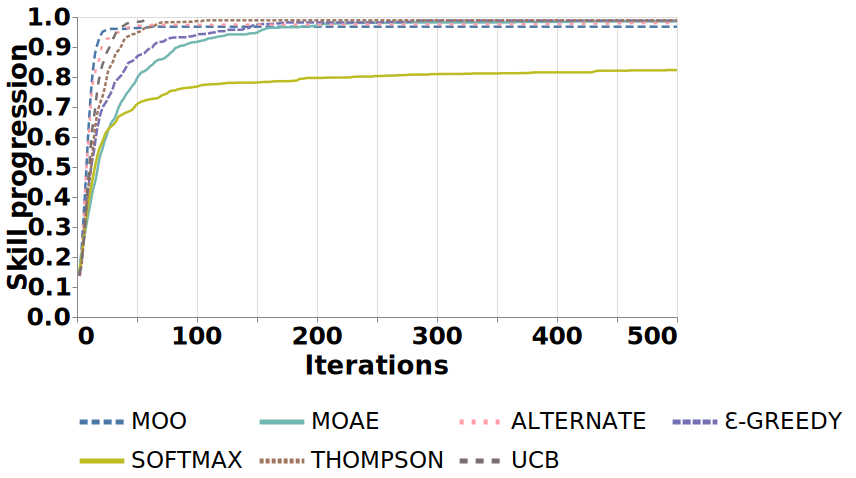

In [2065]:
gap_evol_chart_mab